<a href="https://colab.research.google.com/github/Shailendra114/Books-Recommendation-System-Unsupervised-Machine-Learning-/blob/main/Books_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Books Recommendation System

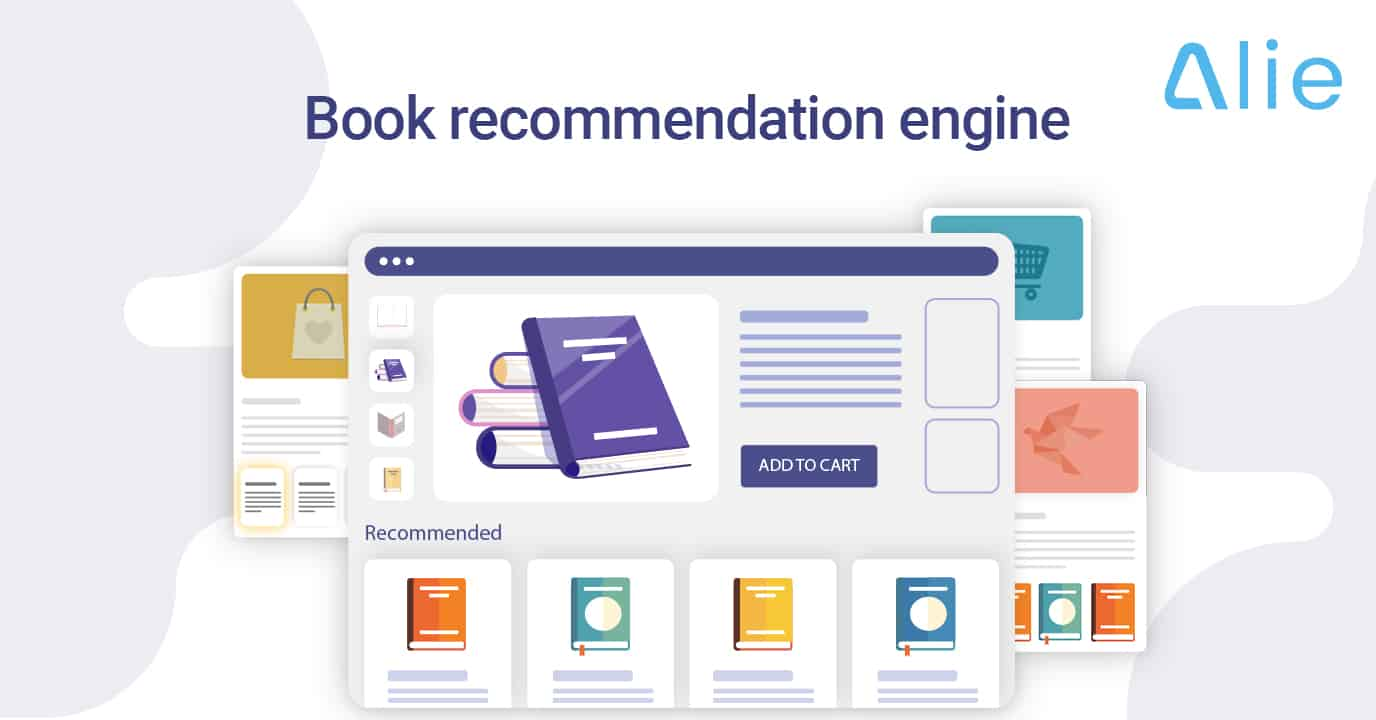

# Objective

Recommender systems have become a part of daily life for users of Amazon and Netflix and even social media. While some sites might use these systems to improve the customer experience (if you liked movie A, you might like movie B) or increase sales (customers who bought product C also bought product D), others are focused on customized advertising and suggestive marketing. As a book lover and former book store manager, I have always wondered where I can find good book recommendations that are both personalized to my interests and also capable of introducing me to new authors and genres. The purpose of this project is to create just such a recommender system (RS).

In [35]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import warnings
warnings.filterwarnings('ignore')

# Data Loading


For data loading,we have to follow two steps--
* Mount our drive and 
* Uplopad the dataset 

Since Our drive is already mounted so lets upload the dataset.

 We are having three dataset--
 * Books
 * Ratings
 * Users

Lets upload the dataset one by one and do the operations.We will first upload books dataset.

In [36]:
# Lets import first dataset that is books dataset 
books=pd.read_csv('/content/drive/MyDrive/ Almabetter/ Amazon Book Recommendation System/Books.csv')

### Basic check of Books  dataset

In [ ]:
# lets check the shape of the dataset
books.shape

(271360, 8)

So,our dataset has 271360 rows and 8 columns.Lets check the different columns of our dataset.

In [ ]:
# Lets check the different coluns of our dataset
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

So, the different columns of our books  dataset are--
* ISBN (It is the unique number for different books)
* Book-Title (It is the title of the books)
* Book-Author (The author of the book)
* Year-Of-Publication (It is the year when book was published)
* Publisher (It is the name of the publisher)
* Image-URL-S (It is URL of the books categorizing it as small)
* Image-URL-M (It is URL of the books categorizing it as medium)
* Image-URL-L (It is URL of the books categorizing it as large)



In [ ]:
# lets check our data from above and below 
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg


In [ ]:
# lets check data type of dataset
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [ ]:
#checking unique values of different features of the books dataset
books.apply(lambda x: len(x.unique()))

ISBN                   271360
Book-Title             242135
Book-Author            102024
Year-Of-Publication    202   
Publisher              16808 
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271042
dtype: int64

So, we can see that all the features has many unique values.And Year of publication has minimum unique values.

Since Books are identified by their respective ISBN and Invalid ISBNs have already been removed from the dataset,lets check the unique values of different features of the books dataset.

In [ ]:
books['Book-Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [ ]:
books['Book-Author'].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

In [ ]:
books['Image-URL-S'].unique()

array(['http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg',
       ...,
       'http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0767409752.01.THUMBZZZ.jpg'],
      dtype=object)

In [ ]:
books.Publisher.unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

In [ ]:
## Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Since,we can see that their are some values in Year-of-publication column like,'DK Publishing Inc','Gallimard','2024','2037','2030',2038, 2026,which could not be there in dataset so,we have to manipulate it before developing a recommender system.

In [37]:
# lets check in how many rows are the year as DK Publishing inc
books.loc[books['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


So, there are two rows in which the Year of Publication is as 'DK Publishing Inc'.We can see that the values are written at wrong places lets make it as correct place.

In [31]:
# Lets correct the values of index number 209538 and 221678 
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = '2000'
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = '2000'
books.at[221687 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[221678 ,'Book-Author'] = 'James Buckley'


In [32]:
# now lets check values of index 209538
books.loc[209538]

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                           Michael Teitelbaum
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [33]:
# now lets check values of index 221678
books.loc[221678]

ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                James Buckley
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L                                                          NaN
Name: 221678, dtype: object

Great,we have corrected these values.

Now lets check in how many rows are year of publication as ,'Gallimard' 

In [28]:
# Lets check in hiw many rows are the year of publicatiobn as gallimard
books.loc[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


So, we can see that in only one row there is year of publication as Gallimard.We can see that the values are written at wrong places.So lets write at its correct place.

In [29]:
# lets coorect the values at index 220731
books.at[220731,'Book-Author']='Jean-Marie Gustave Le'
books.at[220731,'Book-Title']='Peuple du cel,suivi de les Bergers'
books.at[220731,'Publisher']='Gallimard'
books.at[220731,'Year-Of-Publication']='2003'

In [30]:
# lets check the values of index 220731
books.loc[220731]

ISBN                                                          2070426769
Book-Title                            Peuple du cel,suivi de les Bergers
Book-Author                                        Jean-Marie Gustave Le
Year-Of-Publication                                                 2003
Publisher                                                      Gallimard
Image-URL-S            http://images.amazon.com/images/P/2070426769.0...
Image-URL-M            http://images.amazon.com/images/P/2070426769.0...
Image-URL-L                                                          NaN
Name: 220731, dtype: object

Great, we corrected this value as.

Now since we are living in 2022 so we have to remove values in which the year of opublication is greater than 2022.Lets do that--

Lets check is there any null values in books dataset.

In [3]:
# checking null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Okay,so there is one null value in Book-Author,Two null values in Publisher and three null values in Image-URL-L columns.Lets check what are those null values--


In [8]:
# checking null value in Book-Author column
books.loc[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [7]:
# checking null values in Publisher column
books.loc[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [6]:
# checking null value in Image-URL-L column
books.loc[books['Image-URL-L'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN
